In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset from Keras

In [8]:
data = pd.read_csv("D:\#DATA Science\Machine Learning\Algorithms\\train.csv")
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7   
0      1       0       0       0       0       0       0       0       0  \
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779   
0       0  ...         0         0         0         0         0         0  \
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [9]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

## Now this is the use of KNN without using the PCA

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
pred_y = model.predict(np.array(x_test))

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, pred_y)
print(accuracy_score)

0.9663095238095238


## Using PCA 

In [14]:
### just normalization 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [37]:
### PCA
from sklearn.decomposition import PCA
PCA = PCA(n_components=100)        # Just using as much as in dataset means 784
x_train_pca = PCA.fit_transform(x_train)
x_test_pca = PCA.fit_transform(x_test)

In [38]:
model.fit(x_train_pca, y_train)


KNeighborsClassifier()

In [39]:
pred_y_pca = model.predict(x_test_pca)

In [40]:
print(type(pred_y_pca))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [41]:
accuracy = accuracy_score(y_test, pred_y_pca)
print("Accuracy:", accuracy)

Accuracy: 0.41845238095238096


## PCA for Visulization 

In [45]:
from sklearn.decomposition import PCA
pca2d = PCA(n_components=2)
xtrain2d = pca2d.fit_transform(x_train)
xtest2d = pca2d.fit_transform(x_test)

In [46]:
xtrain2d

array([[-6.83222311, -2.41733531],
       [-1.93259763,  1.45931054],
       [-4.44120802, -4.08358296],
       ...,
       [-8.40725878, -0.7706245 ],
       [-4.47421465,  4.02080694],
       [-4.24227537, 14.77105431]])

In [49]:
import plotly.express as px
ytrain2d = y_train.astype(str)
fig = px.scatter(x=xtrain2d[:,0], 
                 y=xtrain2d[:,1],
                 color=ytrain2d,
                 color_discrete_sequence=px.colors.qualitative.G10
                 )
fig.show()

### pCA for 784 to 3d 

In [50]:
from sklearn.decomposition import PCA
pca3d = PCA(n_components=3)
xtrain3d = pca3d.fit_transform(x_train)
xtest3d = pca3d.fit_transform(x_test)
xtrain3d

array([[-6.83222985, -2.41725038,  2.00900602],
       [-1.93259866,  1.45921297,  4.32385909],
       [-4.44124144, -4.08345025,  1.38850333],
       ...,
       [-8.40725237, -0.77080898,  2.23700212],
       [-4.47422656,  4.02097132, -8.19404535],
       [-4.24229972, 14.77341655, -7.07036112]])

In [52]:
import plotly.express as px
ytrain3d = y_train.astype(str)
fig = px.scatter_3d(
                 x=xtrain3d[:,0], 
                 y=xtrain3d[:,1],
                 z=xtrain3d[:,2],
                 color=ytrain3d,
                 color_discrete_sequence=px.colors.qualitative.G10
                 )
fig.show()

In [55]:
### Eigen values are
print("These are the eigen values for 3d ",pca3d.explained_variance_)

These are the eigen values for 3d  [40.60463911 29.08329604 26.65791518]


In [56]:
print("These are the eigen vectors for 3d ",pca3d.components_)

These are the eigen vectors for 3d  [[ 4.12668937e-19 -6.63442596e-19  2.56876284e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-6.79973750e-18 -1.23324217e-17  6.23246305e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.50430540e-17 -2.61095624e-18  6.52524628e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


### Now how to get the optimum value of pca 

In [61]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=None)        # Just using as much as in dataset means 784
x_train_pca = PCA.fit_transform(x_train)
x_test_pca = PCA.fit_transform(x_test)

In [62]:
x_train_pca.shape

(33600, 784)

In [65]:
PCA.components_.shape

(784, 784)

In [67]:
PCA.explained_variance_

array([4.06046391e+01, 2.90832967e+01, 2.66579162e+01, 2.10297885e+01,
       1.78645279e+01, 1.60616290e+01, 1.35094098e+01, 1.26191119e+01,
       1.08015493e+01, 1.00977033e+01, 9.58431820e+00, 8.67013862e+00,
       8.14805202e+00, 7.88549015e+00, 7.71916233e+00, 7.27936293e+00,
       6.89522524e+00, 6.68978006e+00, 6.60430489e+00, 6.53848955e+00,
       5.89706503e+00, 5.81259828e+00, 5.52095871e+00, 5.43324048e+00,
       5.25765015e+00, 5.10498486e+00, 4.85311886e+00, 4.75888420e+00,
       4.63699221e+00, 4.55287640e+00, 4.52697324e+00, 4.41966143e+00,
       4.30851086e+00, 4.19928430e+00, 4.12237298e+00, 4.00615403e+00,
       3.93229661e+00, 3.91476992e+00, 3.78676774e+00, 3.67890666e+00,
       3.56274505e+00, 3.44779238e+00, 3.38956615e+00, 3.28715781e+00,
       3.25001387e+00, 3.17971129e+00, 3.12503854e+00, 3.06606039e+00,
       3.05187233e+00, 3.02075122e+00, 2.94960174e+00, 2.91424268e+00,
       2.79552945e+00, 2.78917051e+00, 2.70686726e+00, 2.67322618e+00,
      

In [68]:
print(np.cumsum(PCA.explained_variance_ratio_))

[0.06077815 0.10431084 0.14421315 0.17569112 0.20243124 0.22647273
 0.24669399 0.26558263 0.28175069 0.29686521 0.31121128 0.32418899
 0.33638522 0.34818844 0.3597427  0.37063865 0.38095961 0.39097306
 0.40085857 0.41064556 0.41947245 0.42817291 0.43643684 0.44456946
 0.45243926 0.46008054 0.46734482 0.47446805 0.48140883 0.4882237
 0.4949998  0.50161528 0.50806437 0.51434998 0.52052046 0.52651699
 0.53240296 0.53826269 0.54393083 0.54943752 0.55477034 0.55993109
 0.56500469 0.56992499 0.57478971 0.57954919 0.58422683 0.58881619
 0.59338432 0.59790587 0.60232091 0.60668303 0.61086746 0.61504236
 0.61909408 0.62309544 0.62700166 0.63084296 0.6346447  0.63841273
 0.64209679 0.64567675 0.64923949 0.65270607 0.65613643 0.65952815
 0.66282556 0.66611926 0.66937122 0.67261949 0.67583245 0.67899092
 0.68213643 0.68525041 0.68834496 0.69140289 0.69443455 0.69741799
 0.70039776 0.70332886 0.70620122 0.70903121 0.71183266 0.71461315
 0.71737527 0.72012151 0.72285226 0.72553535 0.72819734 0.73083

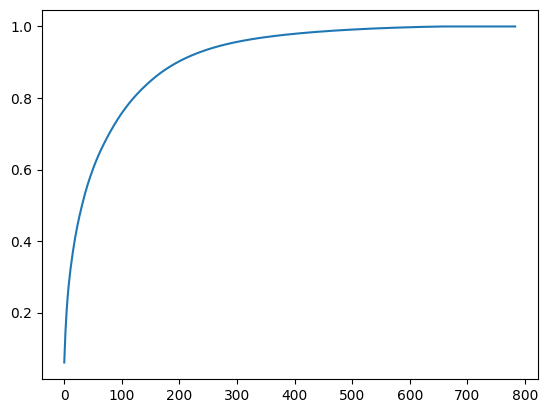

In [69]:
plt.plot(np.cumsum(PCA.explained_variance_ratio_))

In [70]:
### So some where around 210 we reach 90 percent of variance so we will take 200 as the ncomponents in pca or 200 pcas